In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF

%matplotlib inline

C:\Users\gpu\Anaconda3\envs\keras\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [33]:
churn_df=pd.read_csv('https://raw.githubusercontent.com/yhat/demo-churn-pred/master/model/churn.csv')
churn_df.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

In [34]:
churn_result=churn_df['Churn?']
y=np.where(churn_result=='True.',1,0)
np.unique(y, return_counts=True)

(array([0, 1]), array([2850,  483], dtype=int64))

In [35]:
print(churn_df.columns)
to_drop=['State','Area Code','Phone','Churn?']

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')


In [36]:
churn_feat_space=churn_df.drop(to_drop,axis=1)

In [37]:
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feat_space[yes_no_cols]=churn_feat_space[yes_no_cols] == 'yes'

In [38]:
features = churn_feat_space.columns
X=churn_feat_space.as_matrix().astype(np.float)

C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [41]:
print("Feature space holds %d observations and %d features" % X.shape)
print("Unique target labels:", np.unique(y, return_counts=True))

Feature space holds 3333 observations and 17 features
Unique target labels: (array([0, 1]), array([2850,  483], dtype=int64))


In [60]:
from sklearn.model_selection import KFold

def run_cv(X,y,clf_class,**kwargs):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    y_pred=y.copy()
    for train_index,test_index in kf.split(X):
        X_train,X_test=X[train_index],X[test_index]
        y_train=y[train_index]
        clf=clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index]=clf.predict(X_test)
    return y_pred

In [88]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import average_precision_score

def accuracy(y_true,y_pred):
    return np.mean(y_true==y_pred)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("LR:")
print("%.3f" % accuracy(y,run_cv(X,y,LR)))

print("GBC:")
print("%.3f" % accuracy(y,run_cv(X,y,GBC)))

print("SVC:")
print("%.3f" % accuracy(y,run_cv(X,y,SVC)))

print("RF:")
print("%.3f" % accuracy(y,run_cv(X,y,RF)))

print("KNN:")
print("%.3f" % accuracy(y,run_cv(X,y,KNN)))

LR:
0.863
GBC:
0.951
SVC:
0.920
RF:
0.947
KNN:
0.895


[[2819   31]
 [ 235  248]]


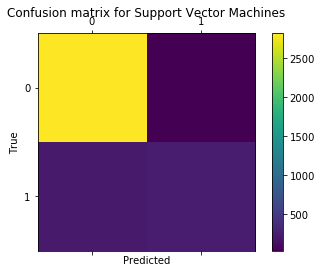

[[2826   24]
 [ 165  318]]


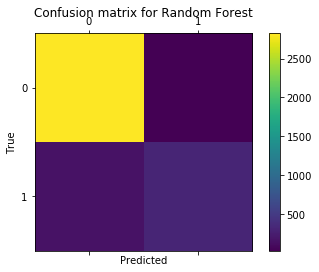

[[2809   41]
 [ 309  174]]


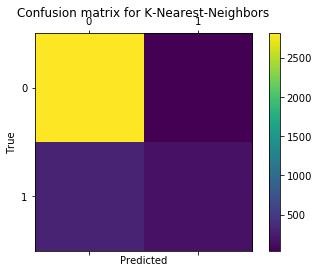

[[2814   36]
 [ 127  356]]


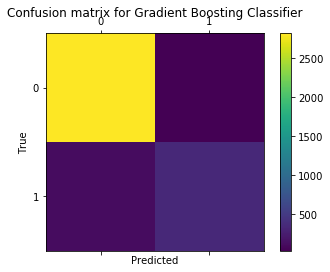

[[2771   79]
 [ 379  104]]


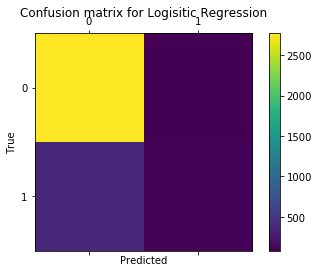

In [89]:
#如果資料集為 imbalanced data，則混淆矩陣就不適合了

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        print(cm)

        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        plt.close()

y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
( "Support Vector Machines", confusion_matrix(y,run_cv(X,y,SVC)) ),
( "Random Forest", confusion_matrix(y,run_cv(X,y,RF)) ),
( "K-Nearest-Neighbors", confusion_matrix(y,run_cv(X,y,KNN)) ),
( "Gradient Boosting Classifier", confusion_matrix(y,run_cv(X,y,GBC)) ),
( "Logisitic Regression", confusion_matrix(y,run_cv(X,y,LR)) )
]

# Pyplot code not included to reduce clutter
# from churn_display import draw_confusion_matrices
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

draw_confusion_matrices(confusion_matrices,class_names)

Support vector machines:


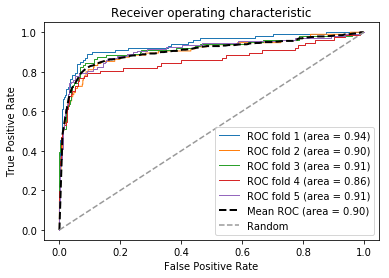

None
Random forests:


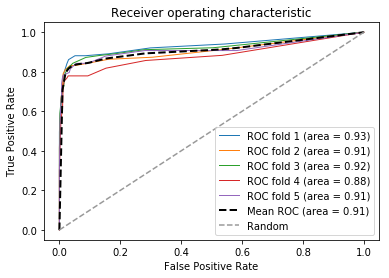

None
K-nearest-neighbors:


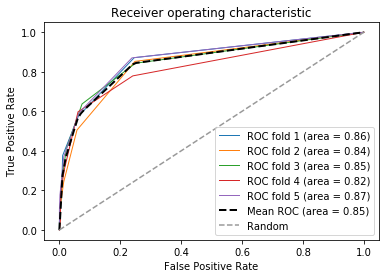

None
Gradient Boosting Classifier:


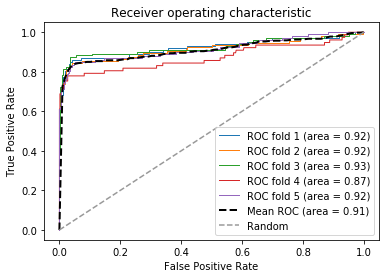

None


In [119]:
#roc越大，分類器效果越好

from sklearn.metrics import roc_curve,auc
from scipy import interp

def plot_roc(X,y,clf_class, **kwargs):
    n_splits=5
    kf = KFold(n_splits, shuffle=True, random_state=42)
    y_prob=np.zeros((len(y),2))
    mean_tpr=0.0
    mean_fpr=np.linspace(0,1,100)
    all_tpr=[]
    i=1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_prob[test_index] = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y[test_index], y_prob[test_index, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        i=i+1
        
    mean_tpr /= kf.get_n_splits(X)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("Support vector machines:")
print(plot_roc(X,y,SVC,probability=True))

print("Random forests:")
print(plot_roc(X,y,RF,n_estimators=18))

print("K-nearest-neighbors:")
print(plot_roc(X,y,KNN))

print("Gradient Boosting Classifier:")
print(plot_roc(X,y,GBC))

In [120]:
train_index,test_index=train_test_split(churn_df.index)

In [162]:
forest=RF()
forest_fit=forest.fit(X[train_index],y[train_index])
forest_predictions=forest_fit.predict(X[test_index])

importance=forest_fit.feature_importances_
std=np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices=np.argsort(importance)[::-1]

In [166]:
print("Feature ranking:")
for f in range(10):
    print("%d. %s (%f)" % (f + 1, features[f], importance[indices[f]]))

Feature ranking:
1. Account Length (0.159066)
2. Int'l Plan (0.123178)
3. VMail Plan (0.107742)
4. VMail Message (0.102885)
5. Day Mins (0.065156)
6. Day Calls (0.055937)
7. Day Charge (0.054297)
8. Eve Mins (0.045822)
9. Eve Calls (0.044483)
10. Eve Charge (0.042470)


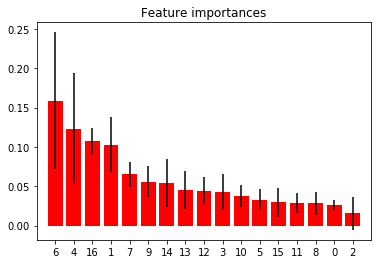

In [185]:
plt.figure()
plt.title("Feature importances")
plt.bar(np.arange(17), importance[indices], yerr=std[indices], color="r", align="center")
plt.xticks(np.arange(17), indices)
plt.xlim([-1, 17])
plt.show()

In [186]:
def run_prob_cv(X, y, clf_class, roc=False, **kwargs):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    y_prob = np.zeros((len(y),2))
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
    y_train = y[train_index]
    clf = clf_class(**kwargs)
    clf.fit(X_train,y_train)
    # Predict probabilities, not classes
    y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

In [187]:
import warnings
warnings.filterwarnings('ignore')

# Use 10 estimators so predictions are all multiples of 0.1
pred_prob = run_prob_cv(X, y, RF, n_estimators=10)
pred_churn = pred_prob[:,1]
is_churn = y == 1

# Number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_churn)
counts[:]

0.0    3028
0.1     127
0.2      48
0.8      25
0.3      24
0.9      19
0.7      16
1.0      15
0.4      13
0.5      11
0.6       7
dtype: int64

In [189]:
from collections import defaultdict
true_prob = defaultdict(float)

# calculate true probabilities
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn == prob])
    true_prob = pd.Series(true_prob)

# pandas-fu
counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']

In [190]:
counts

pred_prob  count  true_prob
0         0.0   3028   0.127477
1         0.1    127   0.023622
2         0.2     48   0.062500
3         0.8     25   0.880000
4         0.3     24   0.250000
5         0.9     19   1.000000
6         0.7     16   0.875000
7         1.0     15   1.000000
8         0.4     13   0.153846
9         0.5     11   0.727273
10        0.6      7   0.714286